In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='white')
sns.set_palette("husl", 4, .75)
sns.set_style("ticks")
# this file is in examples
import sys

import statsmodels.api as sm
from statsmodels.formula.api import ols, wls
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.sandbox.regression.predstd import wls_prediction_std
sns.set_style("darkgrid")

# display related
from IPython.core.display import HTML, display
def html_title(txt, n=1):
    """

    :param txt:
    :param n:
    :return:
    """
    display(HTML('<h{:}> {:}'.format(n, txt.replace("_", " ").title())))

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data from Custom SNL Extract Spreadsheets

In [2]:
sh = ['EP', 'IL', 'RC', 'URC']
dfs = []
for s in sh:
    df = pd.read_excel(r'C:\s\telos\spreadsheets\LCA_SNL_Extract.xlsx', s, convert_float=True, header=0, skiprows=[1,2, 3, 4,5,6,7,8,9])
    df.columns = df.columns.str.split('_', expand=True)
    for c in df.select_dtypes(include=np.number).columns:
        df[c] = df[c].astype(float)
    df = df.set_index('Entity')
    del df['Key']
    dfs.append(df)

In [3]:
df = pd.concat(dfs, axis=1)

In [4]:
df.columns.names =['Metric', 'EvalYr', 'AY']
df.index.name = 'Entity'
D = df.T

In [5]:
D.columns = [i[0] for i in D.columns]   

In [6]:
D.head()

Allstate F&C Insurance Co.  Allstate Insurance Co.  \
Metric EvalYr AY                                                         
EP     2017   2017                   4690800.0              11843749.0   
              2016                   4268570.0              11343299.0   
              2015                   3678228.0              10759277.0   
              2014                   3183211.0              10228514.0   
              2013                   2807912.0               9854890.0   

                    Allstate Northbrook Indem Co.  Allstate P&C Insurance Co.  \
Metric EvalYr AY                                                                
EP     2017   2017                      1295043.0                   2131761.0   
              2016                      1101016.0                   2132542.0   
              2015                       930928.0                   2120503.0   
              2014                       125776.0                   2048997.0   
              2013                        76033.0                   2019764.0   

                    Amer Family Mutl Ins Co S.I.  CSAA Insurance Exchange  \
Metric EvalYr AY                                                            
EP     2017   2017                     2540379.0                1387731.0   
              2016                     1912243.0                1238117.0   
              2015                     1830653.0                1140794.0   
              2014                     1803713.0                1083017.0   
              2013                     1775192.0                1046242.0   

                    Erie Insurance Exchange  Farmers Insurance Exchange  \
Metric EvalYr AY                                                          
EP     2017   2017                1488666.0                   3286601.0   
              2016                1378639.0                   3144561.0   
              2015                1299564.0                   3081729.0   
              2014                1231929.0                   3072714.0   
              2013                1165346.0                   3189628.0   

                    GEICO Advantage Insurance Co.  GEICO Casualty Co.  \
Metric EvalYr AY                                                        
EP     2017   2017                      1295884.0           2488637.0   
              2016                       817947.0           2137820.0   
              2015                       490999.0           1887950.0   
              2014                       251086.0           1632915.0   
              2013                        98439.0           1253650.0   

                    GEICO General Insurance Co.  GEICO Indemnity Co.  \
Metric EvalYr AY                                                       
EP     2017   2017                    5614398.0            3567567.0   
              2016                    5114121.0            3252020.0   
              2015                    4721120.0            3122031.0   
              2014                    4517114.0            3072373.0   
              2013                    4345942.0            2988818.0   

                    Government Employees Ins Co.  \
Metric EvalYr AY                                   
EP     2017   2017                     8861018.0   
              2016                     8143688.0   
              2015                     7586018.0   
              2014                     7353036.0   
              2013                     7156036.0   

                    Integon National Insurance Co.  Interinsurance Exchange  \
Metric EvalYr AY                                                              
EP     2017   2017                       1361206.0                1502614.0   
              2016                        865283.0                1369925.0   
              2015                        807531.0                1308066.0   
              2014                        795676.0                1267355.0   
           

In [ ]:
D.index

In [ ]:
TotClaim = D.loc['URC']  + D.loc['RC']

In [114]:
df = pd.concat((D, pd.concat([TotClaim], keys=['TClaim'], names=['Metric']))).T

In [115]:
df = pd.concat( [df, pd.concat( [df.Loss.div(np.maximum(0.1, df.TClaim), fill_value=np.nan)], keys=['Sev'], axis=1) * 1000,
                pd.concat( [df.EP.div(np.maximum(0.1, df.Loss), fill_value=np.nan)], keys=['LR'], axis=1)], axis=1)

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in maximum
  """Entry point for launching an IPython kernel.
C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in maximum
  


In [116]:
# spot check
# df.head().T.to_csv(r'\temp\dm.csv')
df.head()

Metric                                 EP                                      \
EvalYr                               2017                                       
AY                                   2017        2016        2015        2014   
Allstate F&C Insurance Co.      4690800.0   4268570.0   3678228.0   3183211.0   
Allstate Insurance Co.         11843749.0  11343299.0  10759277.0  10228514.0   
Allstate Northbrook Indem Co.   1295043.0   1101016.0    930928.0    125776.0   
Allstate P&C Insurance Co.      2131761.0   2132542.0   2120503.0   2048997.0   
Amer Family Mutl Ins Co S.I.    2540379.0   1912243.0   1830653.0   1803713.0   

Metric                                                                     \
EvalYr                                                                      
AY                                  2013       2012       2011       2010   
Allstate F&C Insurance Co.     2807912.0  2412994.0  2062371.0  1767179.0   
Allstate Insurance Co.         9854890.0  9556802.0  9144607.0  9203767.0   
Allstate Northbrook Indem Co.    76033.0    82463.0    84456.0    87231.0   
Allstate P&C Insurance Co.     2019764.0  2090472.0  2196758.0  2233617.0   
Amer Family Mutl Ins Co S.I.   1775192.0  1739865.0  1788113.0  1859062.0   

Metric                                                                       \
EvalYr                                                     2015               
AY                                  2009       2008        2015        2014   
Allstate F&C Insurance Co.     1352177.0  1003644.0   3678228.0   3183211.0   
Allstate Insurance Co.         9245354.0  9426530.0  10759277.0  10228514.0   
Allstate Northbrook Indem Co.    79542.0    63200.0    930928.0    125776.0   
Allstate P&C Insurance Co.     2259165.0  2247293.0   2120503.0   2048997.0   
Amer Family Mutl Ins Co S.I.   1873543.0  1969542.0   1830653.0   1803713.0   

Metric                                                            ...     \
EvalYr                                                            ...      
AY                                  2013       2012       2011    ...      
Allstate F&C Insurance Co.     2807912.0  2412994.0  2062371.0    ...      
Allstate Insurance Co.         9854890.0  9556802.0  9144607.0    ...      
Allstate Northbrook Indem Co.    76033.0    82463.0    84456.0    ...      
Allstate P&C Insurance Co.     2019764.0  2090472.0  2196758.0    ...      
Amer Family Mutl Ins Co S.I.   1775192.0  1739865.0  1788113.0    ...      

Metric                               LR                                \
EvalYr                             2001                                 
AY                                 1996      1995      1994      1993   
Allstate F&C Insurance Co.     0.000000  0.000000  0.000000  0.000000   
Allstate Insurance Co.         1.219484  1.257465  1.270305  1.279275   
Allstate Northbrook Indem Co.  0.000000  0.000000  0.000000  0.000000   
Allstate P&C Insurance Co.     1.376299  1.361187  0.654843  1.927943   
Amer Family Mutl Ins Co S.I.   1.241310  1.252096  1.228277  1.250975   

Metric                                                                 \
EvalYr                                       1996                       
AY                                 1992      1996      1995      1994   
Allstate F&C Insurance Co.     0.000000  0.000000  0.000000  0.000000   
Allstate Insurance Co.         1.284688  1.140865  1.169014  1.190576   
Allstate Northbrook Indem Co.  0.000000  0.000000  0.000000  0.000000   
Allstate P&C Insurance Co.     4.334232  1.230695  1.050703  0.484292   
Amer Family Mutl Ins Co S.I.   1.277867  1.204517  1.222715  1.203505   

Metric                                                                  \
EvalYr                                                                   
AY                                 1993      1992       1991      1990   
Allstate F&C Insurance Co.     0.000000  0.000000   0.000000  0.000000   
Allstate Insurance Co.    

In [117]:
# this is the right format: 
df = df.stack(level=[1,2])
df.head(50)

Metric                                         EP        LR       Loss  \
                           EvalYr AY                                     
Allstate F&C Insurance Co. 1996   1987        0.0  0.000000        0.0   
                                  1988        0.0  0.000000        0.0   
                                  1989        0.0  0.000000        0.0   
                                  1990        0.0  0.000000        0.0   
                                  1991        0.0  0.000000        0.0   
                                  1992        0.0  0.000000        0.0   
                                  1993        0.0  0.000000        0.0   
                                  1994        0.0  0.000000        0.0   
                                  1995        0.0  0.000000        0.0   
                                  1996        0.0  0.000000        0.0   
                           2001   1992        0.0  0.000000        0.0   
                                  1993        0.0  0.000000        0.0   
                                  1994        0.0  0.000000        0.0   
                                  1995        0.0  0.000000        0.0   
                                  1996        0.0  0.000000        0.0   
                                  1997        0.0  0.000000        0.0   
                                  1998        0.0  0.000000        0.0   
                                  1999        0.0  0.000000        0.0   
                                  2000        0.0  0.000000        0.0   
                                  2001        0.0  0.000000        0.0   
                           2006   1997        0.0  0.000000        0.0   
                                  1998        0.0  0.000000        0.0   
                                  1999        0.0  0.000000        0.0   
                                  2000        0.0  0.000000        0.0   
                                  2001        0.0  0.000000        0.0   
                                  2002        0.0  0.000000        0.0   
                                  2003        0.0  0.000000        0.0   
                                  2004        0.0  0.000000        0.0   
                                  2005    22771.0  1.244861    18292.0   
                                  2006   275618.0  1.256166   219412.0   
                           2011   2002        0.0  0.000000        0.0   
                                  2003        0.0  0.000000        0.0   
                                  2004        0.0  0.000000        0.0   
                                  2005    22771.0  1.225235    18585.0   
                                  2006   275618.0  1.194056   230825.0   
                                  2007   659995.0  1.130653   583729.0   
                                  2008  1003644.0  1.276188   786439.0   
                                  2009  1352177.0  1.224464  1104301.0   
                                  2010  1767179.0  1.151954  1534071.0   
                                  2011  2062371.0  1.164077  1771679.0   
                           2015   2006   275618.0  1.196124   230426.0   
                                  2007   659995.0  1.137858   580033.0   
                                  2008  1003644.0  1.281644   783091.0   
                                  2009  1352177.0  1.198792  1127950.0   
                                  2010  1767179.0  1.169352  1511246.0   
                                  2011  2062371.0  1.181047  1746223.0   
                                  2012  2412994.0  1.226222  1967828.0   
                                  2013  2807912.0  1.224554  2293008.0   
                                  2014  3183211.0  1.200488  2651597.0   
                                  2015  3678228.0  1.141881  3221202.0   

Metric                                        RC          Sev    TClaim  \
                           EvalYr AY                                      
A

In [ ]:
# want to take the latest evaluation of each AY, i.e.
from io import StringIO
sio = StringIO()
for ay, ev in df.reset_index(level=[1,2])[['EvalYr', 'AY']].groupby('AY').max().iterrows():
    sio.write(f' (AY=={ay} and EvalYr=={ev.values[0]}) or ')
query = sio.getvalue()[:-4]
print(query)

In [118]:
# extract needed parts 
temp= df.reset_index(level=[1,2]) # .query(' EvalYr == 2017 ') # .query(query)
temp.AY  = temp.AY.astype(int)
temp.EvalYr  = temp.EvalYr.astype(int)
df0 = temp.query(query )
# # fix datatypes
# for c in df.dropna(axis=0).select_dtypes(object).columns:
#     df[c] = pd.to_numeric(df[c])

In [ ]:
df0.groupby(level=0).apply(lambda x: print(x[['Sev']]))

In [ ]:
df0.groupby(level=0).apply(lambda x: x[['TClaim', 'Sev']].plot(kind='line', title=x.name, subplots=True, layout=(1,2))) ;

## Processing function 

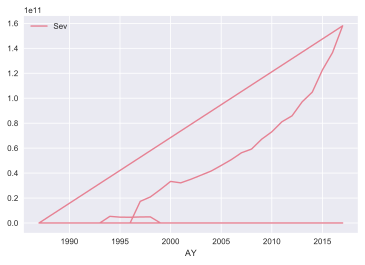

In [125]:
# try some Seaborn! 
df0.plot(kind='line', y='Sev', x='AY', by=df0.index)

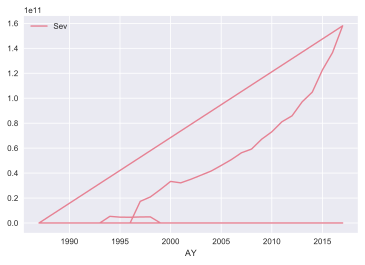

In [126]:
df0.plot(kind='line', y='Sev', x='AY')

In [145]:
# holder for answer
def analyze(var, thres=0.95):
    """
    analysis for variable var = IL EP LR or Sev
    mod = wtd for Sev else not weighted 
    """
    temp = pd.DataFrame(columns = ['co', 'AvgSev', 'NumClms', 'r2', 'wt r2', 'sigma', 'wtd sigma', 'wtd sig / sqrt(n)'])
    temp = temp.set_index('co')
    for n, h in df0.groupby(level=0):
        if n[:10] != 'xxState Farm':
    #         h.AY = h.AY.astype(int)
            h = h.query('AY<2017')
            h = h.dropna(axis=0)
            m = ols(f'{var} ~ AY', data=h).fit()
            if var == 'Sev':
                mw = wls(f'{var} ~ AY', weights=h.TClaim, data=h).fit()
            else:
                mw = m
            if m.rsquared > thres:
#                 html_title('Normal regression ' + n, 2)
#                 display(m.summary())
#                 if var == 'Sev':
#                     html_title('Weighted regression ' + n, 2)
#                     display(mw.summary())
                # do plot 
                _, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(mw, alpha=0.025)
                fig, ax = plt.subplots()
                # plot the dots
                # 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
                ax.plot(h.AY, h[var], '-o', label="data")
                # plot the trend line
                # g-- and r-- specify the color to use
                ax.plot(h.AY, mw.fittedvalues, 'g--.', label="OLS")
                # plot upper and lower ci values
                ax.plot(h.AY, confidence_interval_upper, 'r--')
                ax.plot(h.AY, confidence_interval_lower, 'r--')
                # plot legend
                ax.legend(loc='best');
                plt.title(n)
    #             plotmod(mw, n)
            temp.loc[n, :] = [h[var].mean(), h.TClaim.mean(), m.rsquared, mw.rsquared, np.sqrt(m.scale), np.sqrt(mw.scale), np.sqrt(mw.scale / h.TClaim.mean())]
    html_title('Summary Results')
    temp['cv'] = pd.to_numeric(temp['wtd sigma'] / temp['AvgSev'])
    temp['σ'] = np.sqrt(np.log( temp.cv * temp.cv + 1))
#     display(temp)
    return temp

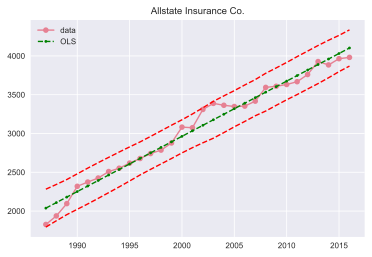

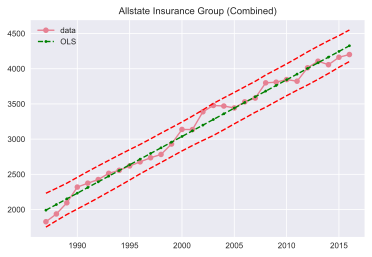

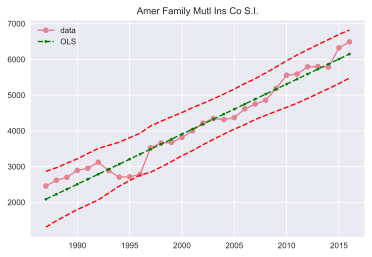

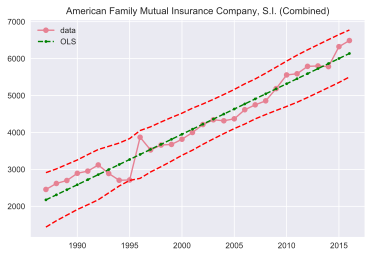

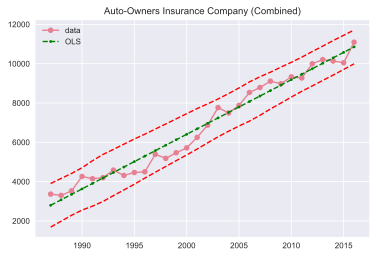

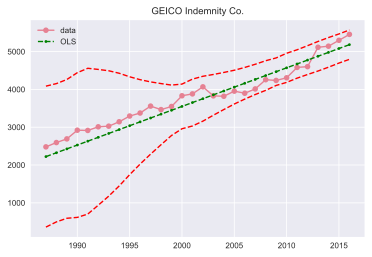

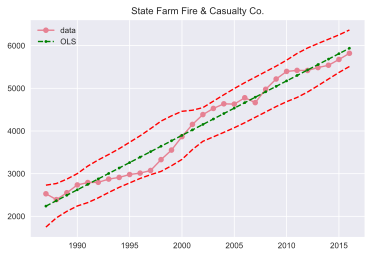

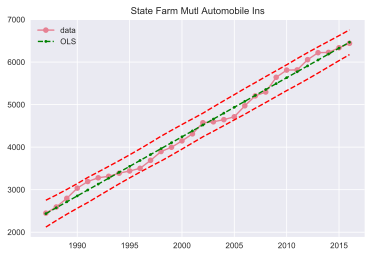

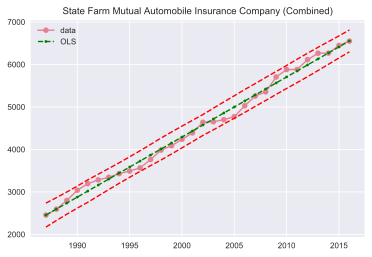

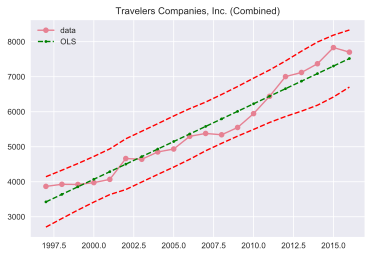

In [141]:
analyze('Sev');

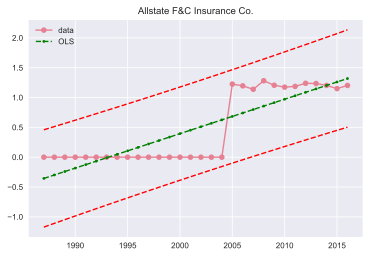

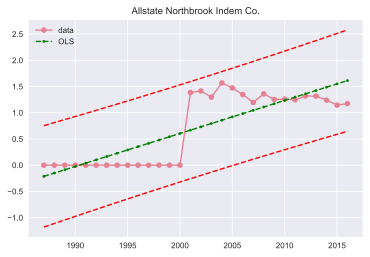

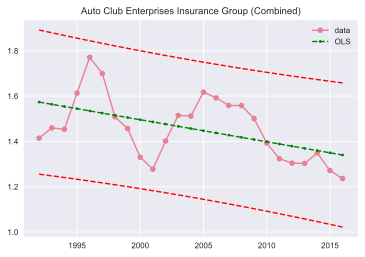

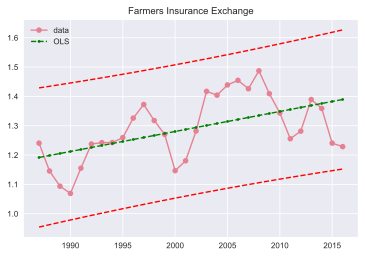

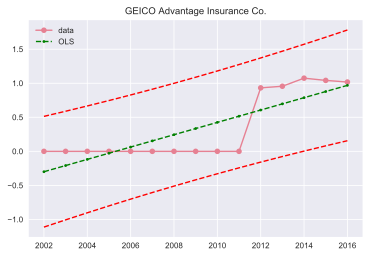

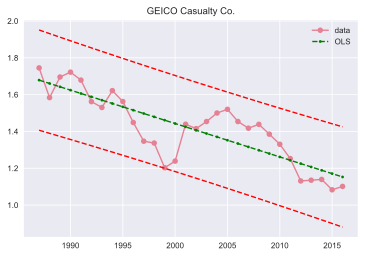

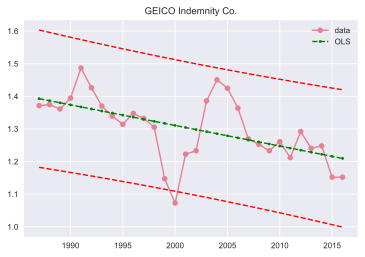

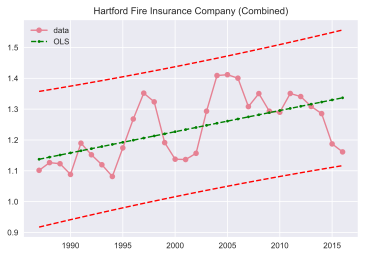

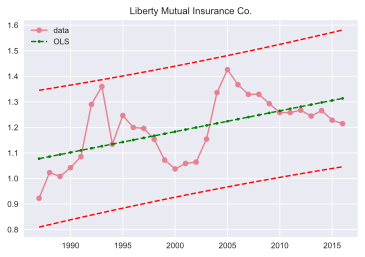

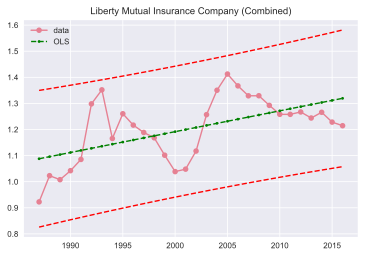

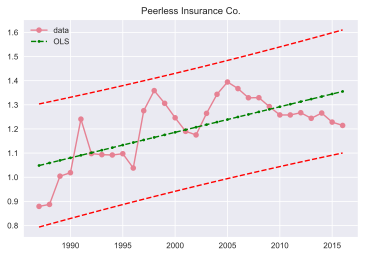

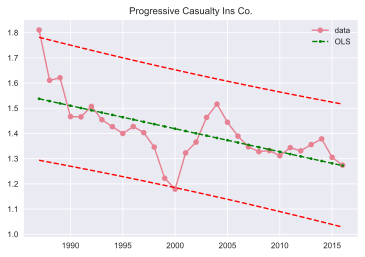

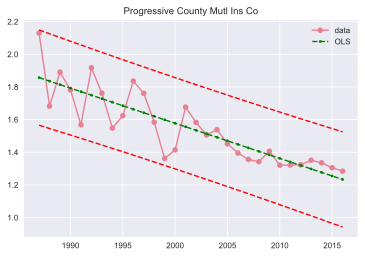

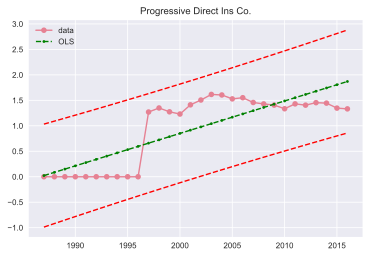

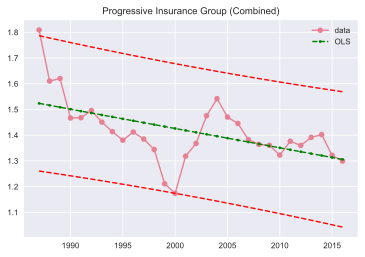

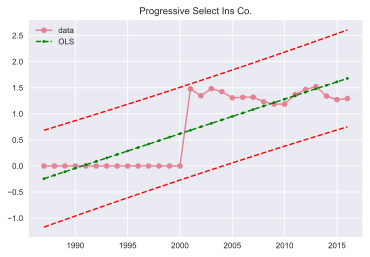

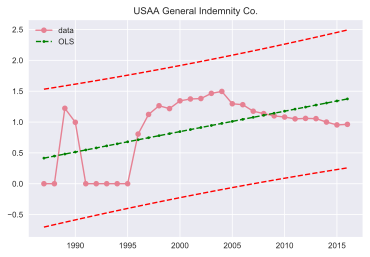

In [149]:
analyze('LR', 0.25);

In [204]:
class Shout(object):
    def __init__(self, text):
        self.text = text

    def _repr_html_(self):
        return "<h1>" + self.text + "</h1>"
    
    def __setattr__(self, i, v)
        sel
    
    def __getattr__(self, i):
        print(i)
        raise AttributeError
#         try:
#             x = object.__getattribute__(self, i)
#         except e:
#             print(x, type(x), 'post call', e)
#             print(f'attr {i}, object returns {x}')
#             raise e
        
#     def _ipython_display_(self):
#         return f"<h1>The text is {self.text}</h1>"

In [205]:
x = Shout('hell')

In [206]:
x

_ipython_canary_method_should_not_exist_
_ipython_display_
_ipython_canary_method_should_not_exist_
_repr_mimebundle_
_ipython_canary_method_should_not_exist_
_ipython_canary_method_should_not_exist_
_repr_markdown_
_ipython_canary_method_should_not_exist_
_repr_svg_
_ipython_canary_method_should_not_exist_
_repr_png_
_ipython_canary_method_should_not_exist_
_repr_pdf_
_ipython_canary_method_should_not_exist_
_repr_jpeg_
_ipython_canary_method_should_not_exist_
_repr_latex_
_ipython_canary_method_should_not_exist_
_repr_json_
_ipython_canary_method_should_not_exist_
_repr_javascript_


<slot wrapper '__getattribute__' of 'object' objects>

In [207]:
df.head()

Metric                                   EP   LR  Loss   RC  Sev  TClaim  URC
                           EvalYr AY                                         
Allstate F&C Insurance Co. 1996   1987  0.0  0.0   0.0  0.0  0.0     0.0  0.0
                                  1988  0.0  0.0   0.0  0.0  0.0     0.0  0.0
                                  1989  0.0  0.0   0.0  0.0  0.0     0.0  0.0
                                  1990  0.0  0.0   0.0  0.0  0.0     0.0  0.0
                                  1991  0.0  0.0   0.0  0.0  0.0     0.0  0.0

In [208]:
test = pd.DataFrame(dict(x=np.linspace(0,1,1001)))

In [211]:
test['y'] = np.sin(1/test.x) * test.x

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sin
  """Entry point for launching an IPython kernel.


Text(0.5,0,'The x axis')

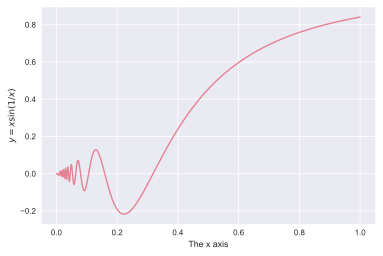

In [214]:
plt.plot(test.x, test.y)
plt.ylabel("$y=x\sin(1/x)$")
plt.xlabel('The x axis')

Text(0.5,0,'The x axis')

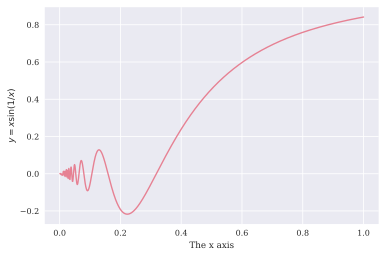

In [215]:
plt.rc('font', family='serif')
# plt.rc('text', usetex=True)
plt.plot(test.x, test.y)
plt.ylabel("$y=x\sin(1/x)$")
plt.xlabel('The x axis')

Text(0.5,0,'The x axis')

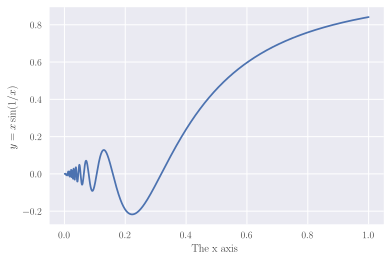

In [218]:
sns.set(context='notebook', style='darkgrid')
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.plot(test.x, test.y)
plt.ylabel("$y=x\sin(1/x)$")
plt.xlabel('The x axis')

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(7,3),dpi=100,
                        sharex=True,sharey=True)
subdemo(axes)
fig.tight_layout()

In [1]:
sns.set(context='poster', style='darkgrid')
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.plot(test.x, test.y)
plt.ylabel("$y=x\sin(1/x)$")
plt.xlabel('The x axis')

NameError: name 'sns' is not defined

In [46]:
class OurClass:

    def __init__(self, a, d):
        self.OurAtt = a
        self.members = d
#         self.__dict__.update(self.members)

        
    def __getitem__(self, it):
        return self.members[it]
    
    def __getattr__(self, it):
        print(f'Requested {it}')
        if it in self.members:
            return self.members[it]
        else:
            return self.__dict__[it]
    
    @property
    def OurAtt(self):
        return self.__OurAtt

    @OurAtt.setter
    def OurAtt(self, val):
        if val < 0:
            self.__OurAtt = 0
        elif val > 1000:
            self.__OurAtt = 1000
        else:
            self.__OurAtt = val

In [47]:
x = OurClass(10,  dict(fn='stephen', ln='mild'))
print(x.OurAtt)

10


In [48]:
x.fn

Requeested fn


'stephen'

In [49]:
x.fn = 'george'

In [50]:
x['fn']

'stephen'

In [51]:
x.fn

'george'

In [52]:
x.__dict__

{'_OurClass__OurAtt': 10,
 'fn': 'george',
 'members': {'fn': 'stephen', 'ln': 'mild'}}

In [5]:
y = OurClass(-100)
y.OurAtt

0

In [6]:
z = OurClass(1200)
z.OurAtt

1000

In [53]:
y = OurClass(256,  dict(fn='john', ln='mild'))

In [8]:
x.__dict__

{'_OurClass__OurAtt': 10}

In [9]:
x.y = 100

In [10]:
x.__dict__

{'_OurClass__OurAtt': 10, 'y': 100}

In [63]:
for k, v in OurClass.__dict__.items():
    print(k, v)
    if k == '__dict__':
        try:
            for kk, vv in v.items():
                print(f'meta {kk} = {vv}')
        except:
            print(f'failed for {k}')

__module__ __main__
__init__ <function OurClass.__init__ at 0x000002AE449ED730>
__getitem__ <function OurClass.__getitem__ at 0x000002AE449ED620>
__getattr__ <function OurClass.__getattr__ at 0x000002AE449ED840>
OurAtt <property object at 0x000002AE449E19F8>
__dict__ <attribute '__dict__' of 'OurClass' objects>
failed for __dict__
__weakref__ <attribute '__weakref__' of 'OurClass' objects>
__doc__ None


In [16]:
x.__sizeof__()

32

In [27]:
x.__dict__.update(dict(z=1000, name='fred'))

In [29]:
x.name

'fred'

In [21]:
dir(x.__dict__)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [25]:
x.__dict__['k'] = 100
x.__dict__

{'_OurClass__OurAtt': 10, 'k': 100, 'y': 100}

In [26]:
x.k

100

In [24]:
xx = dict(a=10)
xx.update(dict(c=2))
xx

{'a': 10, 'c': 2}

In [69]:
def f(x = 20, **kwargs):
    print(x, kwargs)

In [71]:
f(5, **dict(x=10))

TypeError: f() got multiple values for argument 'x'

In [72]:
len(None)

TypeError: object of type 'NoneType' has no len()

In [73]:
rv = None

In [74]:
rv is not None and len(rv) == 1

False

In [7]:
import scipy.stats as ss

fz = ss.lognorm(1)

moms= fz.stats()

np.sqrt(moms[1]) / moms[0]

cv = 0.97
sigma = np.sqrt(np.log(cv*cv + 1))
sigma

fz = ss.lognorm(sigma)
moms  = fz.stats()

np.sqrt(moms[1]) / moms[0]